<a href="https://colab.research.google.com/github/ThoaaPhann/Fuzzy_logic_homework/blob/main/Fuzzy_logic_Rainfall_predection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#### Fuzzy model for rainfall event prediction

In [2]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [73]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

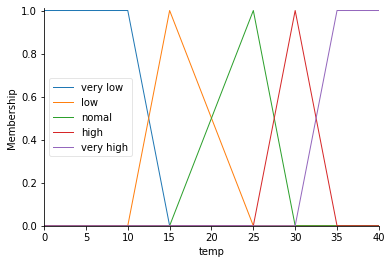

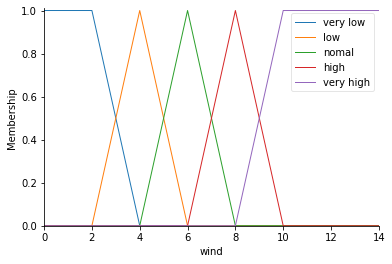

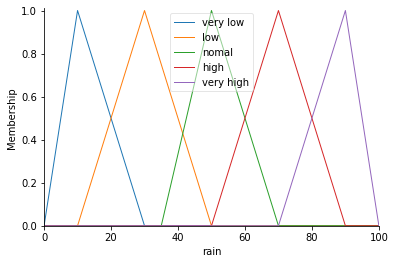

In [74]:
#Define domain
temp = ctrl.Antecedent(np.arange(0,41,1),'temp')
wind = ctrl.Antecedent(np.arange(0,15,1),'wind')
rain  = ctrl.Antecedent(np.arange(0,101,1),'rain')
prediction  = ctrl.Consequent(np.arange(0,101,1),'prediction')

temp ['very low'] = fuzz.trapmf(temp.universe,[0,0,10,15])
temp ['low'] = fuzz.trimf(temp.universe,[10,15,25])
temp ['nomal'] = fuzz.trimf(temp.universe,[15,25,30])
temp ['high'] = fuzz.trimf(temp.universe,[25,30,35])
temp ['very high'] = fuzz.trapmf(temp.universe,[30,35,40,40])

wind ['very low'] = fuzz.trapmf(wind.universe,[0,0,2,4])
wind ['low'] = fuzz.trimf(wind.universe,[2,4,6])
wind ['nomal'] = fuzz.trimf(wind.universe,[4,6,8])
wind ['high'] = fuzz.trimf(wind.universe,[6,8,10])
wind ['very high'] = fuzz.trapmf(wind.universe,[8,10,14,14])

rain ['very low'] = fuzz.trimf(rain.universe,[0,10,30])
rain ['low'] = fuzz.trimf(rain.universe,[10,30,50])
rain ['nomal'] = fuzz.trimf(rain.universe,[35,50,70])
rain ['high'] = fuzz.trimf(rain.universe,[50,70,90])
rain ['very high'] = fuzz.trimf(rain.universe,[70,90,100])

prediction ['very low'] = fuzz.trimf(prediction.universe,[0,10,30])
prediction ['low'] = fuzz.trimf(prediction.universe,[10,30,50])
prediction ['nomal'] = fuzz.trimf(prediction.universe,[35,50,70])
prediction ['high'] = fuzz.trimf(prediction.universe,[50,70,90])
prediction ['very high'] = fuzz.trimf(prediction.universe,[70,90,100])

#Rule 
rule1 = ctrl.Rule(temp['very low']&wind['very low']&rain['very low'],prediction ['very low'])
rule2 = ctrl.Rule(temp['very low']&wind['low']&rain['low'],prediction ['low'])
rule3 = ctrl.Rule(temp['very low']&wind['nomal']&rain['nomal'],prediction ['nomal'])
rule4 = ctrl.Rule(temp['very low']&wind['high']&rain['high'],prediction ['nomal'])
rule5 = ctrl.Rule(temp['very low']&wind['very high']&rain['very high'],prediction ['high'])

rule6 = ctrl.Rule(temp['low']&wind['very low']&rain['very low'],prediction ['low'])
rule7 = ctrl.Rule(temp['low']&wind['low']&rain['low'],prediction ['very low'])
rule8 = ctrl.Rule(temp['low']&wind['nomal']&rain['nomal'],prediction ['nomal'])
rule9 = ctrl.Rule(temp['low']&wind['high']&rain['high'],prediction ['nomal'])
rule10 = ctrl.Rule(temp['low']&wind['very high']&rain['very high'],prediction ['high'])

rule11 = ctrl.Rule(temp['nomal']&wind['very low']&rain['very low'],prediction ['nomal'])
rule12 = ctrl.Rule(temp['nomal']&wind['low']&rain['low'],prediction ['nomal'])
rule13 = ctrl.Rule(temp['nomal']&wind['nomal']&rain['nomal'],prediction ['nomal'])
rule14 = ctrl.Rule(temp['nomal']&wind['high']&rain['high'],prediction ['high'])
rule15 = ctrl.Rule(temp['nomal']&wind['very high']&rain['very high'],prediction ['high'])

rule16 = ctrl.Rule(temp['high']&wind['very low']&rain['very low'],prediction ['nomal'])
rule17 = ctrl.Rule(temp['high']&wind['low']&rain['low'],prediction ['nomal'])
rule18 = ctrl.Rule(temp['high']&wind['nomal']&rain['nomal'],prediction ['high'])
rule19 = ctrl.Rule(temp['high']&wind['high']&rain['high'],prediction ['high'])
rule20 = ctrl.Rule(temp['high']&wind['very high']&rain['very high'],prediction ['very high'])

rule21 = ctrl.Rule(temp['very high']&wind['very low']&rain['very low'],prediction ['high'])
rule22 = ctrl.Rule(temp['very high']&wind['low']&rain['low'],prediction ['high'])
rule23 = ctrl.Rule(temp['very high']&wind['nomal']&rain['nomal'],prediction ['high'])
rule24 = ctrl.Rule(temp['very high']&wind['high']&rain['high'],prediction ['very high'])
rule25 = ctrl.Rule(temp['very high']&wind['very high']&rain['very high'],prediction ['very high'])

temp.view()
wind.view()
rain.view()

70.00000000000004


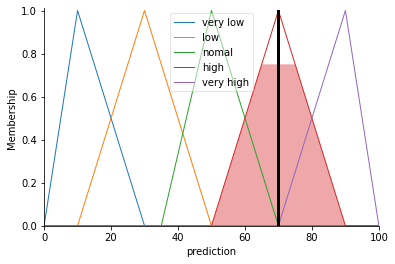

In [81]:
predictioning_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule21,rule22,rule23,rule24,rule25])
predictioning = ctrl.ControlSystemSimulation(predictioning_ctrl)
predictioning.input['temp'] = 25
predictioning.input['wind'] = 8
predictioning.input['rain'] = 65

predictioning.compute()
print(predictioning.output['prediction'])
prediction.view(sim = predictioning)